In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam
#subir archivo
from google.colab import files
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split


In [2]:
# Vamos a asegurar que todos los datos tengan el mismo valor y sean "viables"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
#Subimos nuestros archivo
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [4]:
#revisamos el archivo
df = pd.read_csv(r'winequality-red.csv')
# Mostrar información sobre el set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Crearemos un nuevo df llamado X (notar mayus) con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar
lista_caract = [
  'Cylinders',
  'Displacement',
  'Horsepower',
  'Weight',
  'Acceleration',
  'Model Year',
  'Europe',
  'Japan',
  'USA'
]
# Luego tomando esa lista del df original
X = df[lista_caract]
# Mostraremos los primeros cinco registros para conocer cómo se compone X
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
# Utilizaremos el mismo procedimiento para generar y
lista_etiq = ['quality']
y = df[lista_etiq]
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y
)

**Aplicamos normalizaciòn**

transformamos los datos numéricos de un dataset para que estén en una escala común.

In [ ]:
#usamos una funciòn para los datos que vayamos a tener.
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [ ]:
#decidimos que datos queremos normalizar para traer nuestra red neuronal
normalizador = crear_normalizador(X_train)

**Ahora vamos a crear nuestra red neuronal**

In [ ]:
def miRedNeuronalRegresion(norm):
    model = Sequential([
        norm, # capa inicial : acà nos indica norm , cuantos datos iniciales tengo segùn el archivo subido
        Dense(32, activation='relu'),
        Dense(64, activation='relu'), #la anterior y esta son las capas intermedias , para este caso tenemos 3 capas neuronales , 2 capas tendran 32 puntos y otra tendrà 64
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'), #la anterior y esta son las capas intermedias , para este caso tenemos 3 capas neuronales , 2 capas tendran 32 puntos y otra tendrà 64
        Dense(32, activation='relu'),
        Dense(1) #capa final , es decir esperamos al menos 1 resultado
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001)) #compilamos el modelo, segùn el algoritmo que queremos usar, que puede ser mean_absolute_error o mean_squared_error
    return model

In [ ]:
rn = miRedNeuronalRegresion(normalizador)

In [ ]:
#vamos a entrenar el modelo

history = rn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=100 #esta variable nos indica cuantas veces vamos a repetir el proceso , en este caso son 100 veces , recordemos que el nùmero de veces que se repite dependerà del procesador del equipo
)

In [ ]:
#evaluamos el rendimiento
rn.evaluate(X_test, y_test, verbose=0) #acà es importante saber si el rendimiento es cercano a 0 , entonces tenemos un buen entrenamiento neuronal

0.5004652142524719

In [ ]:
# Creación de predicciones
y_pred = rn.predict(X_test).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


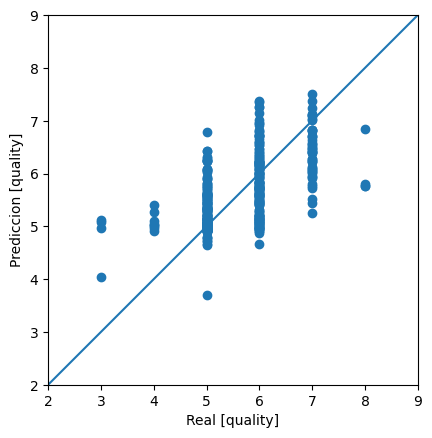

In [ ]:
#graficamos para ver que nos dio la red neuronal segùn la regresiòn
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Real [MPG]')
plt.ylabel('Prediccion [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [ ]:
y_test

,quality
280,6
112,5
633,4
1106,6
576,4
...,...
232,6
1364,6
1181,5
719,5


from matplotlib import pyplot as plt
y_test['quality'].plot(kind='hist', bins=20, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
y_test['quality'].plot(kind='line', figsize=(8, 4), title='quality')
plt.gca().spines[['top', 'right']].set_visible(False)

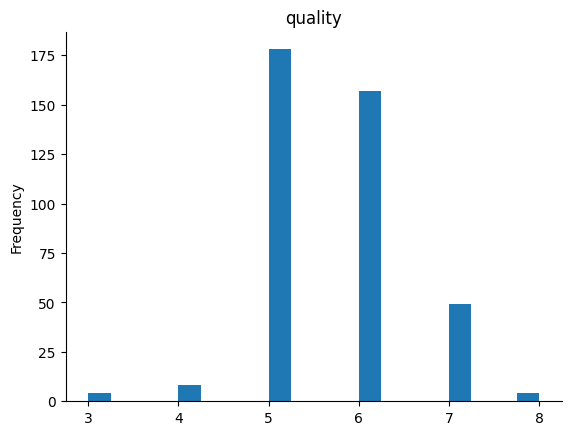

In [ ]:
# @title quality

from matplotlib import pyplot as plt
y_test['quality'].plot(kind='hist', bins=20, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
y_pred

array([5.7161937, 5.1594586, 4.998875 , 6.400469 , 5.0444665, 6.092282 ,
       6.2597303, 6.162895 , 5.5611234, 6.585241 , 5.7612453, 5.170217 ,
       6.22154  , 6.4708915, 5.762792 , 4.7912564, 7.363807 , 5.2669044,
       6.413233 , 7.020832 , 5.0214343, 6.828547 , 5.8047853, 7.5148525,
       5.809483 , 6.4794426, 6.5850134, 4.993788 , 5.3302956, 5.0088773,
       5.115928 , 5.4039354, 5.701824 , 5.505895 , 5.3142457, 5.4403696,
       4.9284325, 5.59294  , 5.614153 , 4.6426167, 5.3024554, 5.0244713,
       6.228987 , 4.723579 , 6.0689754, 4.879924 , 6.02468  , 6.0105677,
       5.140245 , 5.7622676, 5.00018  , 5.0030947, 7.1247616, 5.81338  ,
       5.572765 , 4.974623 , 5.467759 , 5.5215526, 5.4269886, 5.029377 ,
       6.1997013, 5.143295 , 6.2935286, 6.0691166, 5.022935 , 4.9021497,
       5.7291293, 5.3539343, 5.131662 , 6.1747828, 5.4376826, 5.3389297,
       5.577971 , 5.038037 , 6.542513 , 5.9345517, 6.251534 , 4.946545 ,
       5.0821853, 5.5646443, 6.164658 , 4.933919 , 